In [27]:
import pandas as pd
import seaborn
import matplotlib.pyplot as plt

# Loading Data
red_wine = pd.read_csv('wine_data/winequality-red.csv', sep=';')
white_wine = pd.read_csv('wine_data/winequality-white.csv', sep=';')

In [28]:
# Task 1 - Data Preparation & Explorartory Data Analysis (EDA)

# Adding type labels
red_wine['type'] = 'Red'
white_wine['type'] = 'White'

# Combining datasets
combined_wine = pd.concat([red_wine, white_wine], axis=0)

# Wine Data Summary Staistics
print("Red Wine Summary:\n", red_wine.describe())
print("\nWhite Wine Summary:\n", white_wine.describe())

# Wine Data info
print("\nRed Wine Info:")
red_wine.info()
print("\nWhite Wine Info:")
white_wine.info()

# Aggregations
print("\nAverage Values by Quality - Red Wine:\n", red_wine.drop(columns='type').groupby('quality').mean())
print("\nAverage Values by Quality - White Wine:\n", white_wine.drop(columns='type').groupby('quality').mean())


Red Wine Summary:
        fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000           

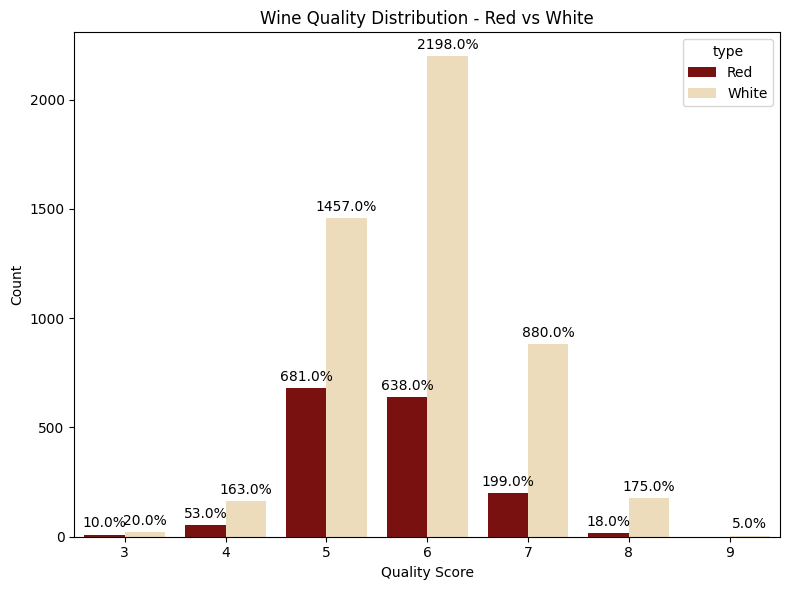

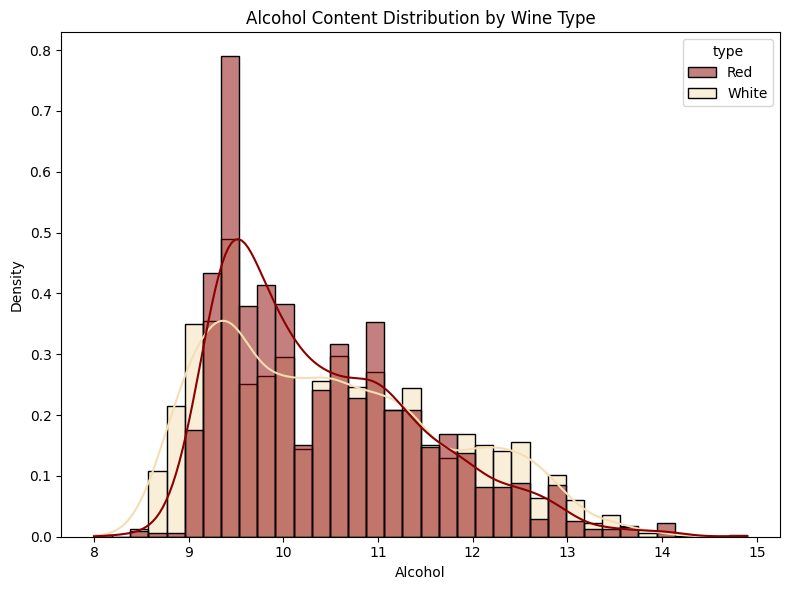

In [29]:
# Plotting Data(Visualisation)

# Quality Distribution - Combined Plot
plt.figure(figsize=(8, 6))

wine_colors = {'Red': '#8B0000', 'White': '#F5DEB3'}

ax = seaborn.countplot(x='quality', hue='type', data=combined_wine, palette=wine_colors)

plt.title("Wine Quality Distribution - Red vs White")
plt.xlabel("Quality Score")
plt.ylabel("Count")

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', padding=3)
    
plt.tight_layout()
plt.show()


# Correlation Heatmap - Spearmans Correlation 
# red_corr = red_wine.select_dtypes(include='number').corr(method='spearman') # Red Wine

# plt.figure(figsize=(12, 8))
# seaborn.heatmap(red_corr, annot=True, cmap='coolwarm', fmt=".2f")
# plt.title('Spearman Correlation - Red Wine')
# plt.tight_layout()
# plt.show()

# white_corr = white_wine.select_dtypes(include='number').corr(method='spearman') # White Wine

# plt.figure(figsize=(12, 8))
# seaborn.heatmap(white_corr, annot=True, cmap='coolwarm', fmt=".2f")
# plt.title('Spearman Correlation - White Wine')
# plt.tight_layout()
# plt.show()

# Alcohol Distribution - Combined Histogram
plt.figure(figsize=(8, 6))

wine_colors = {'Red': '#8B0000', 'White': '#F5DEB3'}

seaborn.histplot(
    data=combined_wine,
    x='alcohol',
    hue='type',
    kde=True,
    stat='density',
    common_norm=False,
    palette=wine_colors
)

plt.title("Alcohol Content Distribution by Wine Type")
plt.xlabel("Alcohol")
plt.ylabel("Density")
plt.tight_layout()
plt.show()

# Pair plot Adventure
# seaborn.pairplot(combined_wine.sample(500), hue='type', vars=['alcohol', 'density', 'pH', 'residual sugar'])
# plt.show()


Red Wine Quality: 
quality
3    0.006254
4    0.033146
5    0.425891
6    0.398999
7    0.124453
8    0.011257
Name: proportion, dtype: float64

White Wine Quality: 
quality
3    0.004083
4    0.033279
5    0.297468
6    0.448755
7    0.179665
8    0.035729
9    0.001021
Name: proportion, dtype: float64


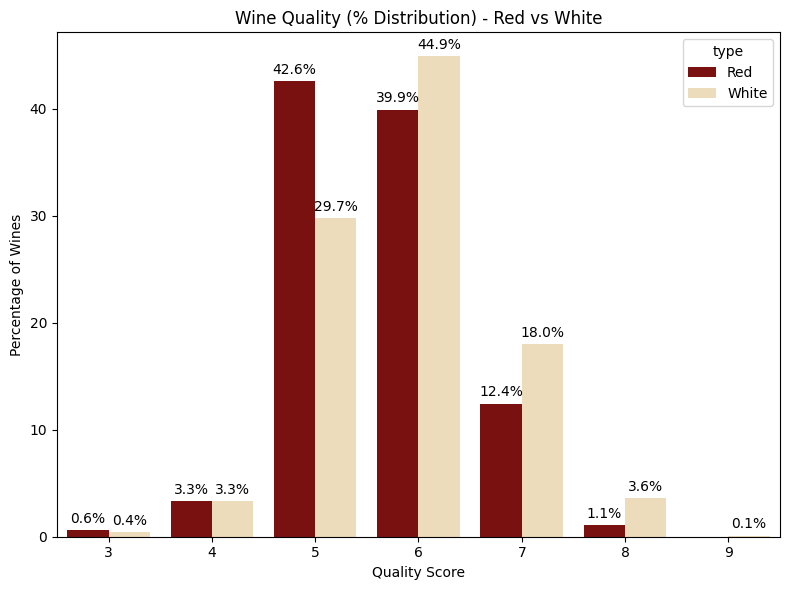

Average quality - Red: 5.6360225140712945
Average quality - White: 5.87790935075541

Red wines rated 7 or above: 13.570981863664791 %
White wines rated 7 or above: 21.641486320947326 %


In [30]:
# Task 1, Part A - Describe the distribution of wine quality across all samples, separately for red and white, and compare the quality distributions between reds and whites. Create suitable plots to illustrate.

print("Red Wine Quality: ")
print(red_wine['quality'].value_counts(normalize=True).sort_index())

print("\nWhite Wine Quality: ")
print(white_wine['quality'].value_counts(normalize=True).sort_index())

# Quality Distribution - Percentage
quality_counts = combined_wine.groupby(['type', 'quality']).size().reset_index(name='count')

totals = quality_counts.groupby('type')['count'].transform('sum')

quality_counts['percentage'] = 100 * quality_counts['count'] / totals

# Plot
plt.figure(figsize=(8, 6))
ax = seaborn.barplot(data=quality_counts, x='quality', y='percentage', hue='type', palette={'Red': '#8B0000', 'White': '#F5DEB3'})
plt.title("Wine Quality (% Distribution) - Red vs White")
plt.ylabel("Percentage of Wines")
plt.xlabel("Quality Score")

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', padding=3)

plt.tight_layout()
plt.show()

# Mean Quality of both wine types
print("Average quality - Red:", red_wine['quality'].mean())
print("Average quality - White:", white_wine['quality'].mean())

print("\nRed wines rated 7 or above:", (red_wine['quality'] >= 7).mean() * 100, "%")
print("White wines rated 7 or above:", (white_wine['quality'] >= 7).mean() * 100, "%")


Interpretation Task 1 Part A
TODO

Red Wine - Alcohol Mean: 10.42
Red Wine - Alcohol Std Dev: 1.07
White Wine - Alcohol Mean: 10.51
White Wine - Alcohol Std Dev: 1.23
Red Wine - Alcohol Category Distribution:
alcohol_cat
mid     0.704
high    0.175
low     0.121
Name: proportion, dtype: float64

White Wine - Alcohol Category Distribution:
alcohol_cat
mid     0.637
high    0.190
low     0.173
Name: proportion, dtype: float64


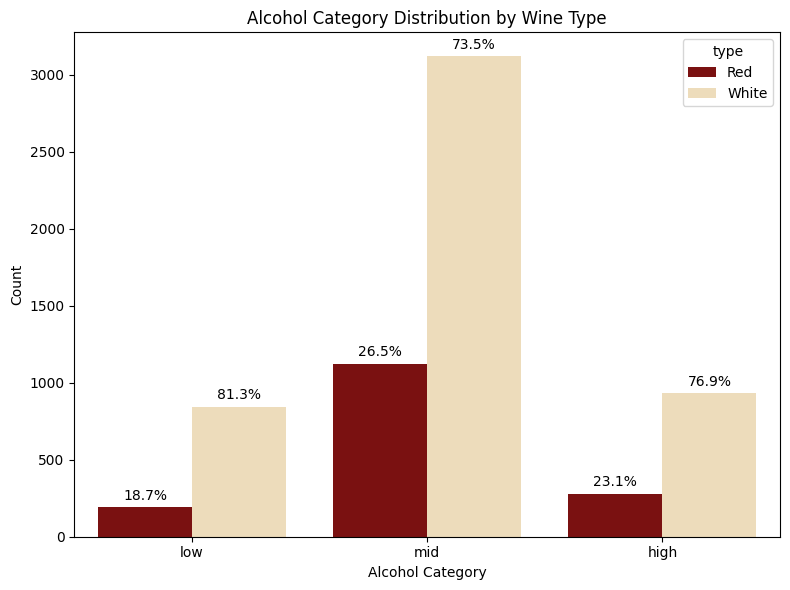

Red Wine - Avg Quality by Alcohol Category:
alcohol_cat
high    6.346429
low     5.247423
mid     5.526222
Name: quality, dtype: float64

White Wine - Avg Quality by Alcohol Category:
alcohol_cat
high    6.549356
low     5.547929
mid     5.766741
Name: quality, dtype: float64


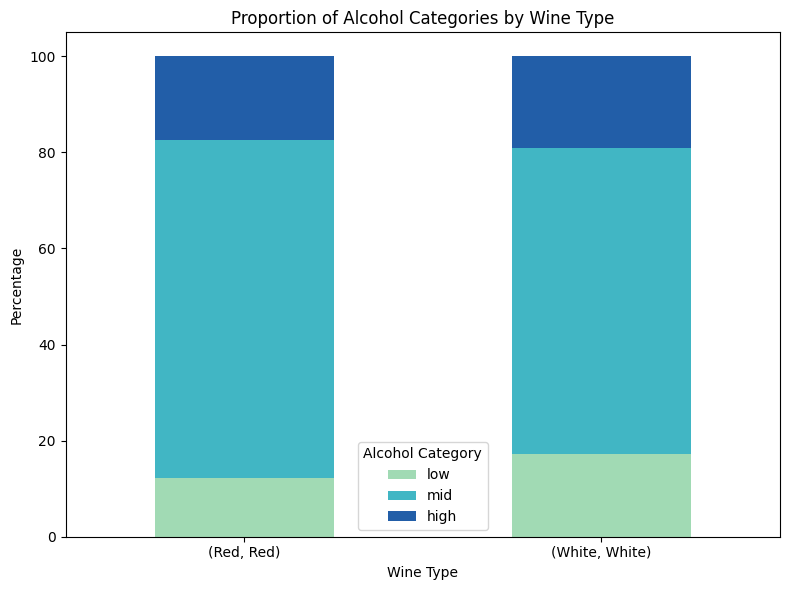

In [31]:
# Task 1, Part B Discretise the alcohol content variables (separately for whites and reds) into low, mid, high based on its distribution. Create a 3-valued "alcohol_cat" variable to represent this. low < (average - stddev) | (average - stddev) < mid < (average + stddev) | high > (average + stddev). 

import numpy as np
from pandas.api.types import CategoricalDtype

# Getting the mean and standard deviation of alcohol content
# Breakpoints Based on Statistics
# Rule used:
# low < (mean − stddev)
# mid = between (mean − stddev) and (mean + stddev)
# high > (mean + stddev)

red_alcohol_mean = red_wine['alcohol'].mean()
red_alcohol_std = red_wine['alcohol'].std()

print("Red Wine - Alcohol Mean:", round(red_alcohol_mean, 2))
print("Red Wine - Alcohol Std Dev:", round(red_alcohol_std, 2))

white_alcohol_mean = white_wine['alcohol'].mean()
white_alcohol_std = white_wine['alcohol'].std()

print("White Wine - Alcohol Mean:", round(white_alcohol_mean, 2))
print("White Wine - Alcohol Std Dev:", round(white_alcohol_std, 2))

# Red Wine
low_red = red_alcohol_mean - red_alcohol_std
high_red = red_alcohol_mean + red_alcohol_std

# White Wine
low_white = white_alcohol_mean - white_alcohol_std
high_white = white_alcohol_mean + white_alcohol_std

# Red wine categories
conditions_red = [
    red_wine['alcohol'] < low_red,
    red_wine['alcohol'] > high_red,
]
choice_red = ['low', 'high']
red_wine['alcohol_cat'] = np.select(conditions_red, choice_red, default='mid')

# Red wine categories
conditions_white = [
    white_wine['alcohol'] < low_white,
    white_wine['alcohol'] > high_white,
]
choice_white = ['low', 'high']
white_wine['alcohol_cat'] = np.select(conditions_white, choice_white, default='mid')

print("Red Wine - Alcohol Category Distribution:")
print(red_wine['alcohol_cat'].value_counts(normalize=True).round(3))

print("\nWhite Wine - Alcohol Category Distribution:")
print(white_wine['alcohol_cat'].value_counts(normalize=True).round(3))

# Add wine type for combined plot
red_wine['type'] = 'Red'
white_wine['type'] = 'White'

combined_wine = pd.concat([red_wine, white_wine], axis=0)

# Sort alcohol_cat consistently
cat_order = CategoricalDtype(categories=["low", "mid", "high"], ordered=True)
combined_wine['alcohol_cat'] = combined_wine['alcohol_cat'].astype(cat_order)

plt.figure(figsize=(8, 6))
ax = seaborn.countplot(data=combined_wine, x='alcohol_cat', hue='type', palette={'Red': '#8B0000', 'White': '#F5DEB3'})
plt.title("Alcohol Category Distribution by Wine Type")
plt.xlabel("Alcohol Category")
plt.ylabel("Count")

# Total Counts for each alocohol category
total_counts = combined_wine.groupby('alcohol_cat', observed=True)['type'].value_counts().unstack().fillna(0)

# Calculate column-wise percentages (by alcohol_cat)
percentages = total_counts.divide(total_counts.sum(axis=1), axis=0) * 100

for container in ax.containers:
    labels = []
    for bar in container:
        alcohol_cat = bar.get_x() + bar.get_width() / 2.0
        cat = bar.get_label()  # better to use bar index
        height = bar.get_height()
        x_pos = round(bar.get_x() + bar.get_width() / 2.0)
        
        alcohol_label = ax.get_xticklabels()[x_pos].get_text()
        total = total = total_counts.loc[alcohol_label].sum()
        pct = (height / total) * 100 if total else 0
        labels.append(f'{pct:.1f}%')
    ax.bar_label(container, labels=labels, padding=3)

plt.tight_layout()
plt.show()

# Average quality by alcohol category
print("Red Wine - Avg Quality by Alcohol Category:")
print(red_wine.groupby('alcohol_cat')['quality'].mean())

print("\nWhite Wine - Avg Quality by Alcohol Category:")
print(white_wine.groupby('alcohol_cat')['quality'].mean())

# Percentage Breakdown
alcohol_cat_dist = (
    combined_wine.groupby(['type', 'alcohol_cat'], observed=True).size()
    .groupby(level=0)
    .apply(lambda x: 100 * x / x.sum())
    .unstack()
    .fillna(0)
)

# Correct column order
alcohol_cat_dist = alcohol_cat_dist[["low", "mid", "high"]]

# Visual Plot
alcohol_cat_dist.plot(kind='bar', stacked=True, color=['#a1dab4', '#41b6c4', '#225ea8'], figsize=(8, 6))

plt.title("Proportion of Alcohol Categories by Wine Type")
plt.ylabel("Percentage")
plt.xlabel("Wine Type")
plt.xticks(rotation=0)
plt.legend(title='Alcohol Category')
plt.tight_layout()
plt.show()

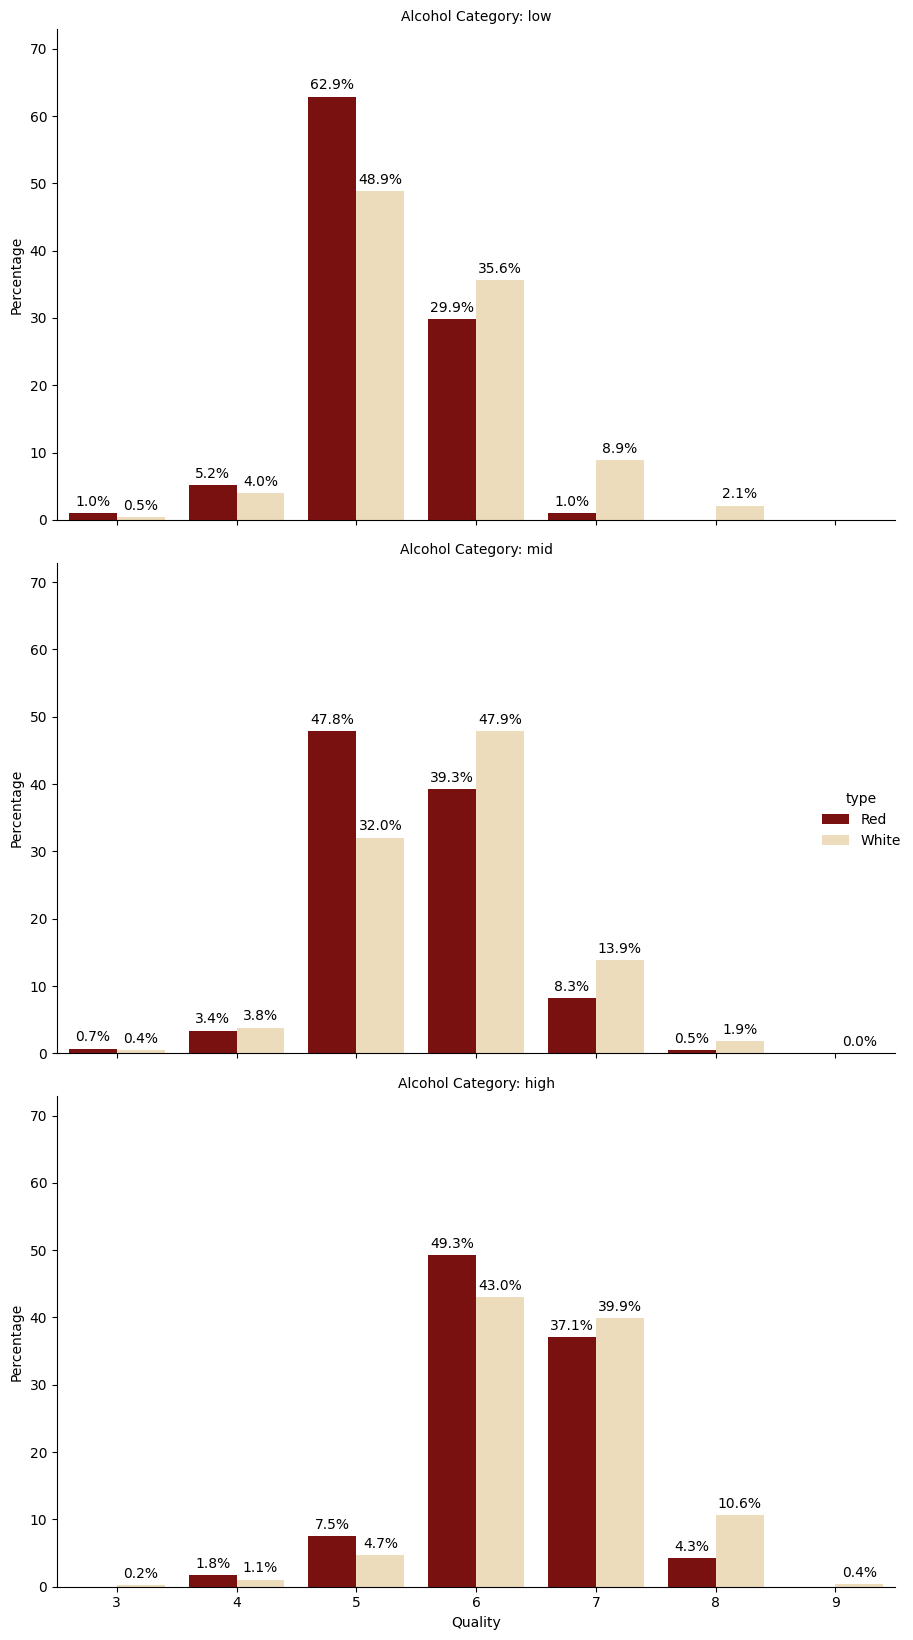

In [32]:
# Task 1, Part C - Describe the distribution of wine quality as in (1.A), but separately for low-, mid-, and high-alcohol content. Create suitable plots to illustrate. Can you draw any conclusions on the relationship between alcohol content and quality?

# The percentage Distribution of quality by alcohol category
quality_dist = (
    combined_wine.groupby(['alcohol_cat', 'type', 'quality'], observed=True)
    .size()
    .groupby(level=[0, 1], observed=True)
    .transform(lambda x: 100 * x / x.sum())
    .reset_index(name='percentage')
)

# Plotting
graph = seaborn.catplot(
    data=quality_dist,
    x='quality',
    y='percentage',
    hue='type',
    col='alcohol_cat',
    kind='bar',
    palette={'Red': '#8B0000', 'White': '#F5DEB3'},
    height=5.5,  
    aspect=1.5,  
    col_wrap=1  
)

graph.set_titles("Alcohol Category: {col_name}")
graph.set_axis_labels("Quality", "Percentage")
graph.set(ylim=(0, quality_dist['percentage'].max() + 10))

for ax in graph.axes.flat:
    for container in ax.containers:
        ax.bar_label(container, fmt='%.1f%%', padding=3) 

plt.tight_layout()
plt.show()

Conclusions Drawn from Task 1 Part C results
TODO

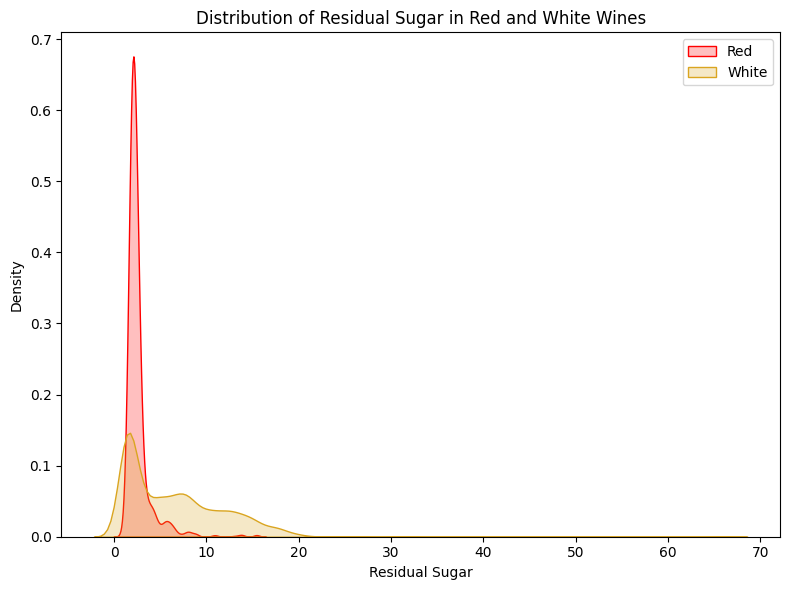

Chosen threshold for sweetness: 3.0
isSweet
0    0.503155
1    0.496845
Name: proportion, dtype: float64


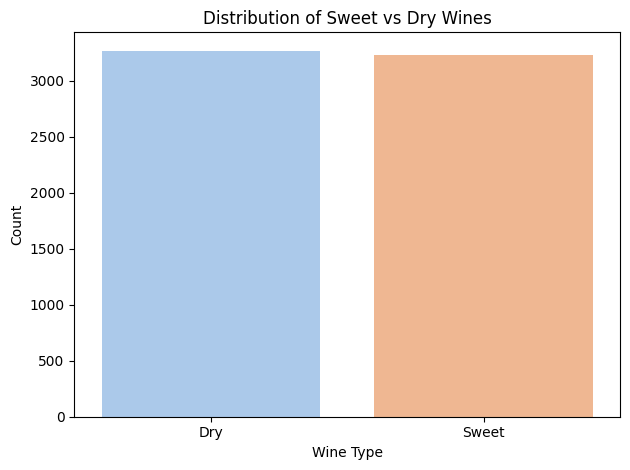

In [33]:
# Task 1, Part D - Plot the residual sugar variable and identify a suitable threshold to separate "sweet" from "dry" wines*. Create a new "isSweet" binary variable to represent these two classes. The distributions of residual sugar are skewed for both reds and whites (in fact most wines in this dataset are dry according to the official definition, e.g., https://winefolly.com/deep-dive/sugar-in-wine-chart/)Links to an external site.. A practical approach in this case is to pick a threshold that splits the dataset (almost) evenly, as that will give you two balanced classes for your classifier. So your task is to find a threshold such that each class has approximately the same number of records.

# Residual Sugar distribution Plot
plt.figure(figsize=(8, 6))
seaborn.kdeplot(red_wine['residual sugar'], label='Red', fill=True, color='red')
seaborn.kdeplot(white_wine['residual sugar'], label='White', fill=True, color='goldenrod')
plt.title("Distribution of Residual Sugar in Red and White Wines")
plt.xlabel("Residual Sugar")
plt.legend()
plt.tight_layout()
plt.show()

# Threshold
threshold = combined_wine['residual sugar'].median()
print("Chosen threshold for sweetness:", round(threshold, 2))

combined_wine['isSweet'] = (combined_wine['residual sugar'] > threshold).astype(int)

print(combined_wine['isSweet'].value_counts(normalize=True))

# Sweetness Distribution Plot
seaborn.countplot(data=combined_wine, x='isSweet', hue='isSweet', palette='pastel', legend=False)
plt.title("Distribution of Sweet vs Dry Wines")
plt.xticks([0, 1], ['Dry', 'Sweet'])
plt.ylabel("Count")
plt.xlabel("Wine Type")
plt.tight_layout()
plt.show()

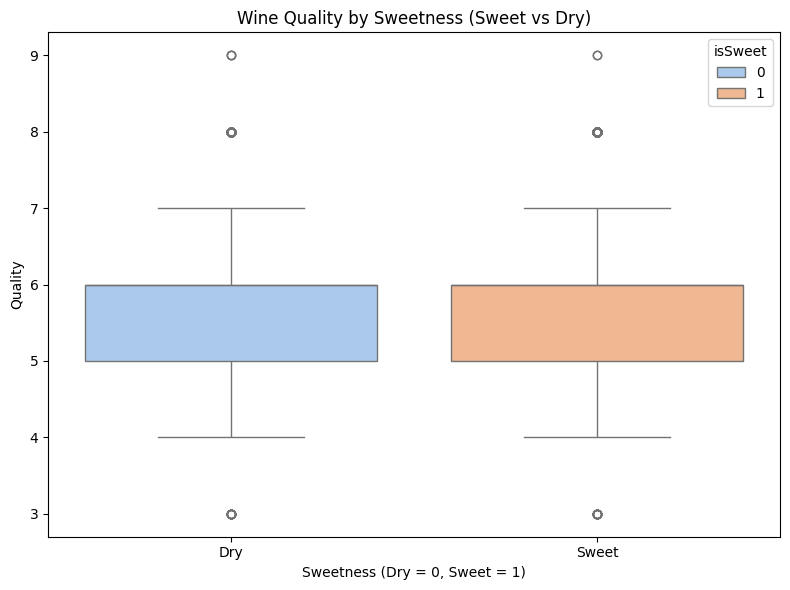

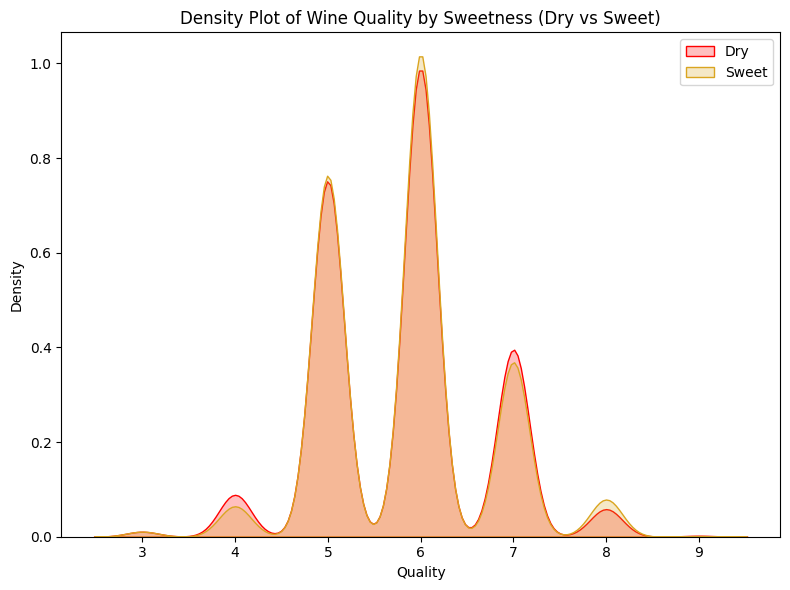

Average Quality by Sweetness (Dry = 0, Sweet = 1):
isSweet
0    5.807586
1    5.829306
Name: quality, dtype: float64

Median Quality by Sweetness (Dry = 0, Sweet = 1):
isSweet
0    6.0
1    6.0
Name: quality, dtype: float64


In [34]:
# Task 1, Part E - Using the threshold from (1.D), repeat the distribution analysis of quality vs isSweet. Are sweet wines perceived as lower or higher quality than dry wines?

# Quaity Distribution by isSweet (Sweet vs Dry), Box Plot
plt.figure(figsize=(8, 6))

# Boxplot or Violin plot
seaborn.boxplot(data=combined_wine, x='isSweet', y='quality', hue='isSweet', palette='pastel')
plt.title("Wine Quality by Sweetness (Sweet vs Dry)")
plt.xlabel("Sweetness (Dry = 0, Sweet = 1)")
plt.ylabel("Quality")
plt.xticks([0, 1], ['Dry', 'Sweet'])
plt.tight_layout()
plt.show()

# Density plot for quality by sweetness (Dry vs Sweet), Density Plot, for another way of Visualizing it
plt.figure(figsize=(8, 6))
seaborn.kdeplot(data=combined_wine[combined_wine['isSweet'] == 0], x='quality', label='Dry', fill=True, color='red')
seaborn.kdeplot(data=combined_wine[combined_wine['isSweet'] == 1], x='quality', label='Sweet', fill=True, color='goldenrod')
plt.title("Density Plot of Wine Quality by Sweetness (Dry vs Sweet)")
plt.xlabel("Quality")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()

# Mean and median quality comparison
mean_quality_by_sweetness = combined_wine.groupby('isSweet')['quality'].mean()
median_quality_by_sweetness = combined_wine.groupby('isSweet')['quality'].median()

print("Average Quality by Sweetness (Dry = 0, Sweet = 1):")
print(mean_quality_by_sweetness)

print("\nMedian Quality by Sweetness (Dry = 0, Sweet = 1):")
print(median_quality_by_sweetness)

Task 1, Part E
Are sweet wines perceived as lower or higher quality than dry wines?

Interpretation:
Very similar average and median quality: This suggests that sweet wines are, on average, not higher or lower quality than dry wines. The quality ratings are very similar, both on average and at the median.

Given the close average and median, it appears that there isn’t a strong correlation between sweetness and wine quality based on this dataset. This is interesting because you might expect that sweetness could influence how wine is perceived (with sweet wines potentially having higher quality ratings in some cases). But in this case, it looks quite balanced.

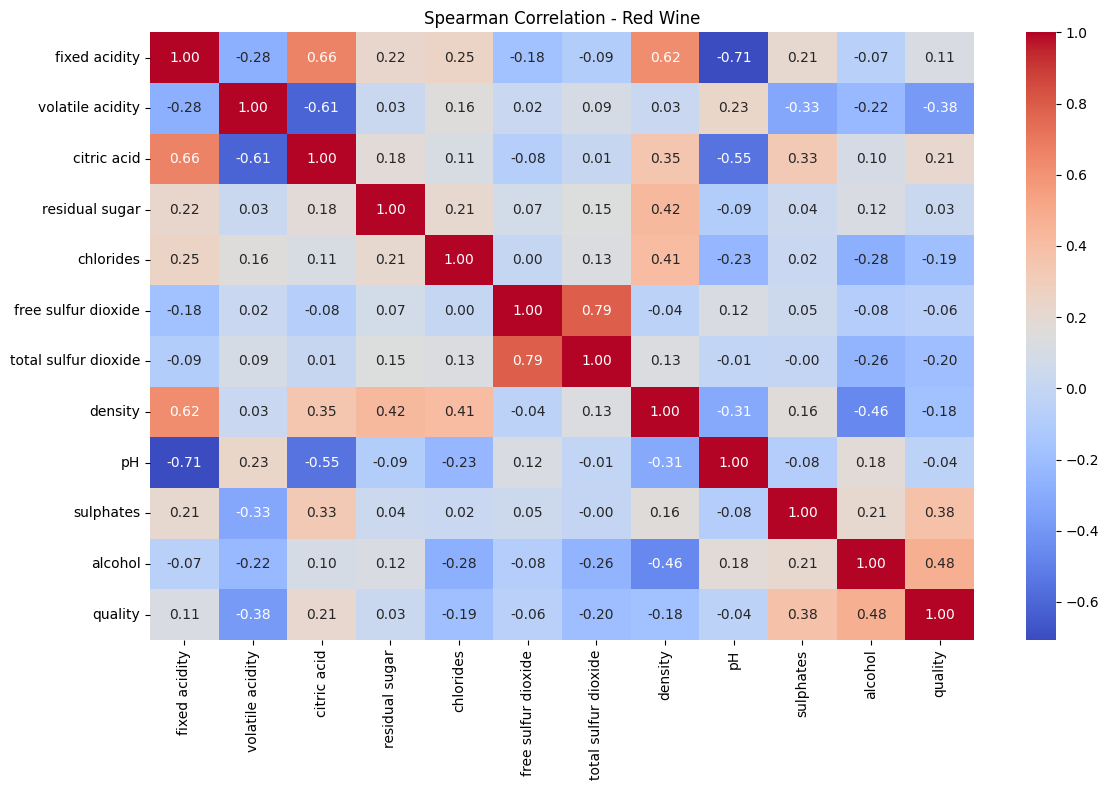


Red Wine Correlation Matrix:
                       fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.278282     0.661708   
volatile acidity          -0.278282          1.000000    -0.610259   
citric acid                0.661708         -0.610259     1.000000   
residual sugar             0.220701          0.032386     0.176417   
chlorides                  0.250904          0.158770     0.112577   
free sulfur dioxide       -0.175137          0.021163    -0.076452   
total sulfur dioxide      -0.088417          0.094110     0.009400   
density                    0.623071          0.025014     0.352285   
pH                        -0.706674          0.233572    -0.548026   
sulphates                  0.212654         -0.325584     0.331074   
alcohol                   -0.066576         -0.224932     0.096456   
quality                    0.114084         -0.380647     0.213481   

                      residual sugar  chlorides  free sulf

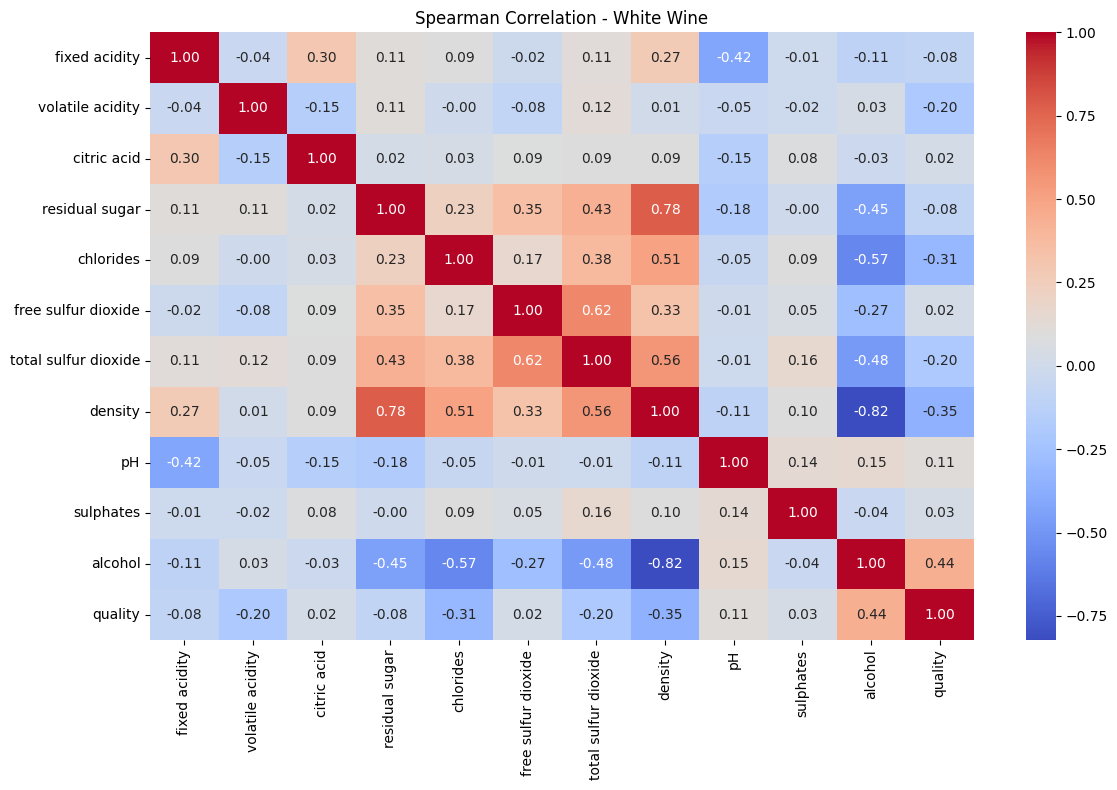


White Wine Correlation Matrix:
                       fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.042865     0.297878   
volatile acidity          -0.042865          1.000000    -0.150410   
citric acid                0.297878         -0.150410     1.000000   
residual sugar             0.106725          0.108627     0.024621   
chlorides                  0.094691         -0.004934     0.032659   
free sulfur dioxide       -0.024542         -0.081213     0.088314   
total sulfur dioxide       0.112649          0.117614     0.093219   
density                    0.270031          0.010124     0.091425   
pH                        -0.418341         -0.045204    -0.146193   
sulphates                 -0.013238         -0.016902     0.079766   
alcohol                   -0.106827          0.033967    -0.029170   
quality                   -0.084485         -0.196562     0.018333   

                      residual sugar  chlorides  free su

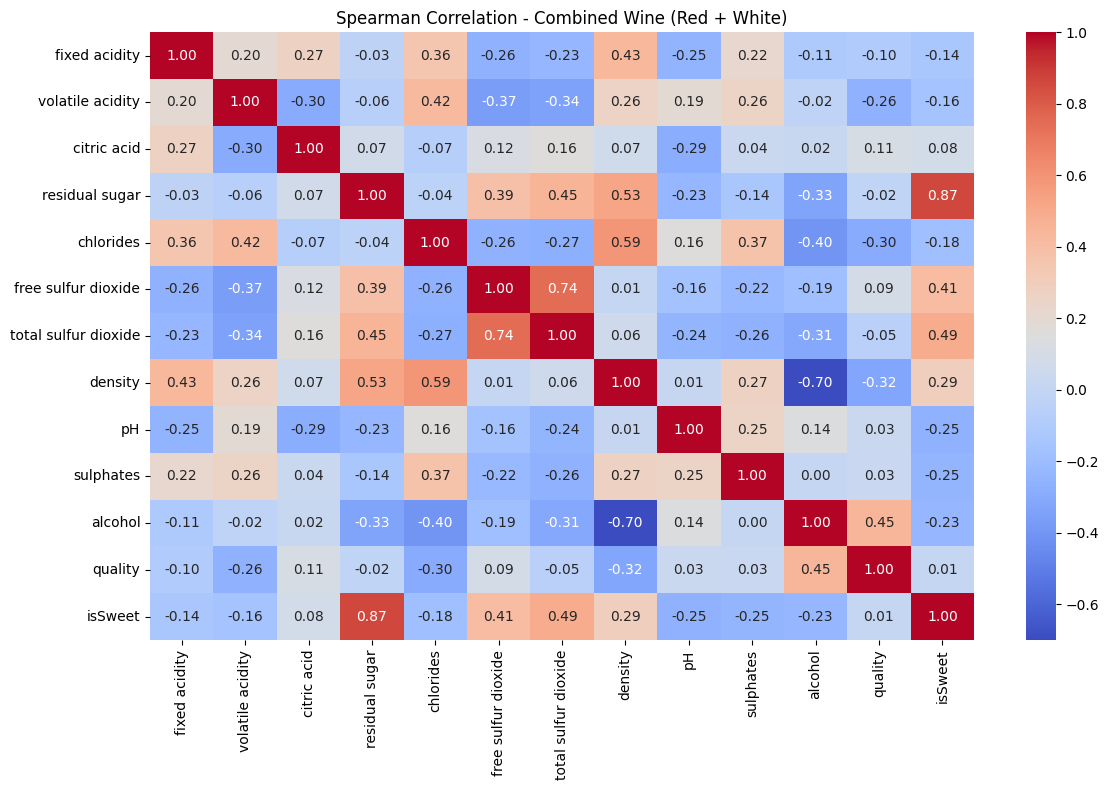


Combined Wine Correlation Matrix:
                       fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000          0.200272     0.270568   
volatile acidity           0.200272          1.000000    -0.295129   
citric acid                0.270568         -0.295129     1.000000   
residual sugar            -0.032254         -0.064384     0.074920   
chlorides                  0.355964          0.415896    -0.074084   
free sulfur dioxide       -0.259914         -0.365673     0.122058   
total sulfur dioxide      -0.233259         -0.343534     0.159355   
density                    0.434056          0.261437     0.065690   
pH                        -0.250044          0.194876    -0.285905   
sulphates                  0.220145          0.255042     0.036898   
alcohol                   -0.110650         -0.023924     0.019653   
quality                   -0.098154         -0.257806     0.105711   
isSweet                   -0.136713         -0.159196 

In [35]:
"""
Task 2 - Try and determine which subset of your variables can be most useful for learning
This is in preparation to applying machine learning to create your model. To do this, analyse correlations between:

- Each pair of variables
- Each variable and the outcome (quality)
-Produce a visual representation of the Correlation Matrix, using  seaborn, matplotlib, or AltairLinks to an external site.
Comment on how some of the variables may relate to others. For this task, you may use Pandas methods to automatically create correlation matrices, for example
 DataFrame.corr. Take care when using the correct metrics, i.e. you must choose between {‘pearson’, ‘kendall’, ‘spearman’}. Consult the documentation to 
 learn about these metrics.
"""

# Correlation Heatmap - Spearmans Correlation 
red_corr = red_wine.select_dtypes(include='number').corr(method='spearman') # Red Wine

plt.figure(figsize=(12, 8))
seaborn.heatmap(red_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Spearman Correlation - Red Wine')
plt.tight_layout()
plt.show()

print("\nRed Wine Correlation Matrix:\n", red_corr)

white_corr = white_wine.select_dtypes(include='number').corr(method='spearman') # White Wine

plt.figure(figsize=(12, 8))
seaborn.heatmap(white_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Spearman Correlation - White Wine')
plt.tight_layout()
plt.show()

print("\nWhite Wine Correlation Matrix:\n", white_corr)

# Combined Correlation Heatmap
combined_corr = combined_wine.select_dtypes(include='number').corr(method='spearman')

plt.figure(figsize=(12, 8))
seaborn.heatmap(combined_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Spearman Correlation - Combined Wine (Red + White)')
plt.tight_layout()
plt.show()

print("\nCombined Wine Correlation Matrix:\n", combined_corr)

#  if two variables carry too much of the same signal, it may confuse or overfit your model — so this helps in feature selection.
# Good Predictors of Quality:
# alcohol → 0.45 correlation with quality → moderate positive.

# volatile acidity → -0.26 → inverse relationship (more acidity = lower quality).

# density → -0.32 → Higher density, generally lower quality.

# chlorides → -0.30 → More saltiness = worse perception.

In [36]:
# Filter correlations with 'quality' only
red_quality_corr = red_corr['quality'].sort_values(key=abs, ascending=False)
white_quality_corr = white_corr['quality'].sort_values(key=abs, ascending=False)
combined_quality_corr = combined_corr['quality'].sort_values(key=abs, ascending=False)

print("\nRed Wine - Correlation with Quality:\n", red_quality_corr)
print("\nWhite Wine - Correlation with Quality:\n", white_quality_corr)
print("\nCombined Wine - Correlation with Quality:\n", combined_quality_corr)



Red Wine - Correlation with Quality:
 quality                 1.000000
alcohol                 0.478532
volatile acidity       -0.380647
sulphates               0.377060
citric acid             0.213481
total sulfur dioxide   -0.196735
chlorides              -0.189922
density                -0.177074
fixed acidity           0.114084
free sulfur dioxide    -0.056901
pH                     -0.043672
residual sugar          0.032048
Name: quality, dtype: float64

White Wine - Correlation with Quality:
 quality                 1.000000
alcohol                 0.440369
density                -0.348351
chlorides              -0.314488
total sulfur dioxide   -0.196680
volatile acidity       -0.196562
pH                      0.109362
fixed acidity          -0.084485
residual sugar         -0.082070
sulphates               0.033319
free sulfur dioxide     0.023713
citric acid             0.018333
Name: quality, dtype: float64

Combined Wine - Correlation with Quality:
 quality                 

The combined Spearman correlation matrix helps identify variables with strong predictive power 
for wine quality, such as alcohol (positive correlation) and volatile acidity (negative correlation). 
It also highlights features that are highly interrelated, such as residual sugar and isSweet. 
This analysis supports informed feature selection for the next phase of machine learning modeling.